# 1. Import Libraries

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Dataset

In [173]:
df_country = pd.read_csv("data/country.csv",  index_col="id")
df_league = pd.read_csv("data/league.csv", index_col="id")
df_match = pd.read_csv("data/match.csv",  index_col="id")
df_players = pd.read_csv("data/players.csv", delimiter="|",  index_col="id")
df_team = pd.read_csv("data/team.csv", delimiter="|",  index_col="id")

/var/folders/gx/k5m32j_16ts37x6v8_n14c9h0000gn/T/ipykernel_47894/2524956791.py:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_match = pd.read_csv("data/match.csv",  index_col="id")


# 3. Understand the Data

In [174]:
df_country.info()
df_league.info()
df_players.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 1 to 24558
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    11 non-null     object
dtypes: object(1)
memory usage: 176.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 1 to 24558
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country_id  11 non-null     int64 
 1   name        11 non-null     object
dtypes: int64(1), object(1)
memory usage: 264.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 11060 entries, 1 to 11075
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player_api_id       11060 non-null  int64  
 1   player_name         11060 non-null  object 
 2   player_fifa_api_id  11060 non-null  int64  
 3   birthday            11060 non-null  object 
 4   height              11060 non-

In [175]:
df_country.head(5)
df_team.columns
df_match.head(5)

,country_id,league_id,season,stage,date,matcway_team_aph_api_id,home_team_api_id,ai_id,home_team_goal,away_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
id,,,,,,,,,,,,,,,,,,,,,
1,1,1.0,2008/2009,1.0,2008-08-17 00:00:00,492473.0,9987.0,9993.0,1.0,1.0,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
2,1,1.0,2008/2009,1.0,2008-08-16 00:00:00,492474.0,10000.0,9994.0,0.0,0.0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
3,1,1.0,2008/2009,1.0,2008-08-16 00:00:00,492475.0,9984.0,8635.0,0.0,3.0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
4,1,1.0,2008/2009,1.0,2008-08-17 00:00:00,492476.0,9991.0,9998.0,5.0,0.0,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
5,1,1.0,2008/2009,1.0,2008-08-16 00:00:00,492477.0,7947.0,9985.0,1.0,3.0,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


# 4. Data Processing/Preparation

Merge league and country dataframes by country_id

In [176]:
# Merge the country and league dataframes by country id
df_league.merge(right=df_country, how="inner", left_on="country_id", right_on="id", suffixes=["_league", "_country"])

,country_id,name_league,name_country
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy
5,13274,Netherlands Eredivisie,Netherlands
6,15722,Poland Ekstraklasa,Poland
7,17642,Portugal Liga ZON Sagres,Portugal
8,19694,Scotland Premier League,Scotland
9,21518,Spain LIGA BBVA,Spain


In [177]:
df_match.isna().sum()

Index(['country_id', 'league_id', 'season', 'stage', 'date',
       'matcway_team_aph_api_id', 'home_team_api_id', 'ai_id',
       'home_team_goal', 'away_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=114)

Drop columns from the match DataFrame with missing data and with data we do not care about (i.e. players on each team).

In [178]:
df_match.columns

new_columns = ['season', 'stage', 'date', 'league_id', 'home_team_goal', 'away_team_goal', 'home_team_api_id', 'ai_id']
df_match = df_match[new_columns]

Drop duplicated and unnecessary ids from league and team DataFrames so that these columns do not show up when DataFrames are merged.

In [179]:
df_league = df_league.drop("country_id", axis=1)
df_team = df_team.drop("team_fifa_api_id", axis=1)

Merge match DataFrames with other DataFrames by team and league id to create one DataFrame for all data

In [180]:
df_match = df_match.merge(right=df_league, how="inner", left_on="league_id", right_on="id")
df_match = df_match.merge(right=df_team, how="inner", left_on="home_team_api_id", right_on="team_api_id")
df_match = df_match.merge(right=df_team, how="inner", left_on="ai_id", right_on="team_api_id")

/var/folders/gx/k5m32j_16ts37x6v8_n14c9h0000gn/T/ipykernel_47894/3456576629.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df_match = df_match.merge(right=df_league, how="inner", left_on="league_id", right_on="id")


In [181]:
df_match.head(5)

,season,stage,date,league_id,home_team_goal,away_team_goal,home_team_api_id,ai_id,name,team_api_id_x,team_long_name_x,team_short_name_x,team_api_id_y,team_long_name_y,team_short_name_y
0,2008/2009,1.0,2008-08-17 00:00:00,1.0,1.0,1.0,9987.0,9993.0,Belgium Jupiler League,9987,KRC Genk,GEN,9993,Beerschot AC,BAC
1,2008/2009,1.0,2008-08-16 00:00:00,1.0,0.0,0.0,10000.0,9994.0,Belgium Jupiler League,10000,SV Zulte-Waregem,ZUL,9994,Sporting Lokeren,LOK
2,2008/2009,1.0,2008-08-16 00:00:00,1.0,0.0,3.0,9984.0,8635.0,Belgium Jupiler League,9984,KSV Cercle Brugge,CEB,8635,RSC Anderlecht,AND
3,2008/2009,1.0,2008-08-17 00:00:00,1.0,5.0,0.0,9991.0,9998.0,Belgium Jupiler League,9991,KAA Gent,GEN,9998,RAEC Mons,MON
4,2008/2009,1.0,2008-08-16 00:00:00,1.0,1.0,3.0,7947.0,9985.0,Belgium Jupiler League,7947,FCV Dender EH,DEN,9985,Standard de Liège,STL


In [182]:
df_match.columns

Index(['season', 'stage', 'date', 'league_id', 'home_team_goal',
       'away_team_goal', 'home_team_api_id', 'ai_id', 'name', 'team_api_id_x',
       'team_long_name_x', 'team_short_name_x', 'team_api_id_y',
       'team_long_name_y', 'team_short_name_y'],
      dtype='object')

Remove all unnecessary and duplicated columns from df_match DataFrame, save back into original DataFrame

In [183]:
df_match = df_match[['season', 'stage', 'date','home_team_goal', 'away_team_goal', 'name', 'team_long_name_x', 'team_long_name_y']]

In [184]:
df_match.head(5)

,season,stage,date,home_team_goal,away_team_goal,name,team_long_name_x,team_long_name_y
0,2008/2009,1.0,2008-08-17 00:00:00,1.0,1.0,Belgium Jupiler League,KRC Genk,Beerschot AC
1,2008/2009,1.0,2008-08-16 00:00:00,0.0,0.0,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren
2,2008/2009,1.0,2008-08-16 00:00:00,0.0,3.0,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht
3,2008/2009,1.0,2008-08-17 00:00:00,5.0,0.0,Belgium Jupiler League,KAA Gent,RAEC Mons
4,2008/2009,1.0,2008-08-16 00:00:00,1.0,3.0,Belgium Jupiler League,FCV Dender EH,Standard de Liège


Rename columns to appropriate values

In [185]:
df = df_match.rename(columns={"name": "league", "team_long_name_x": "home_team", "team_long_name_y": "away_team"})

In [186]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          25979 non-null  object 
 1   stage           25979 non-null  float64
 2   date            25979 non-null  object 
 3   home_team_goal  25979 non-null  float64
 4   away_team_goal  25979 non-null  float64
 5   league          25979 non-null  object 
 6   home_team       25979 non-null  object 
 7   away_team       25979 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.6+ MB


(25979, 8)

In [187]:
df.isna().sum()

season            0
stage             0
date              0
home_team_goal    0
away_team_goal    0
league            0
home_team         0
away_team         0
dtype: int64

In [188]:
df["season"].value_counts()
df["stage"].value_counts()
df["home_team_goal"].value_counts()

home_team_goal
1.0     8400
2.0     6339
0.0     5896
3.0     3288
4.0     1385
5.0      457
6.0      161
7.0       38
8.0        9
9.0        4
10.0       2
Name: count, dtype: int64

In [189]:
# sort values by season, determine min and max season
df.sort_values('season')
df["season"].value_counts()

season
2008/2009    3326
2015/2016    3326
2014/2015    3325
2010/2011    3260
2012/2013    3260
2009/2010    3230
2011/2012    3220
2013/2014    3032
Name: count, dtype: int64

# 5. Univariate Analysis

Text(0.5, 1.0, 'Boxplot for Home Team Goals')

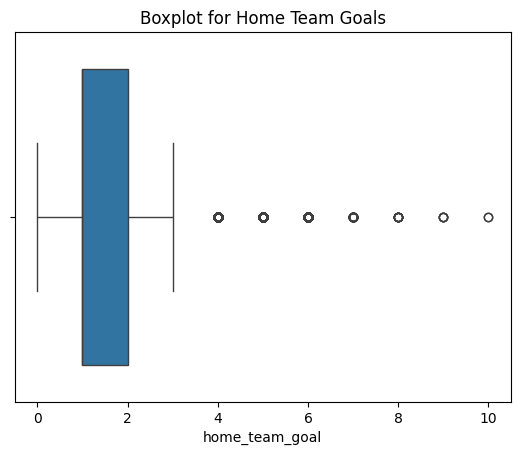

In [218]:
# Scatterplot of the distribution of home goals in matches
sns.boxplot(data=df, x="home_team_goal")
df.loc[df["home_team_goal"] == df["home_team_goal"].max()]
plt.title("Boxplot for Home Team Goals")

Text(0.5, 1.0, 'Boxplot for Away Team Goals')

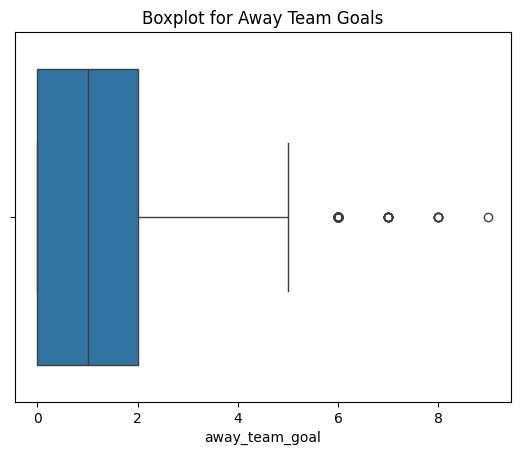

In [219]:
sns.boxplot(data=df, x="away_team_goal")
df.loc[df["away_team_goal"] == df["away_team_goal"].max()]
plt.title("Boxplot for Away Team Goals")

Text(0.5, 1.0, '# of Matches Played in Each League')

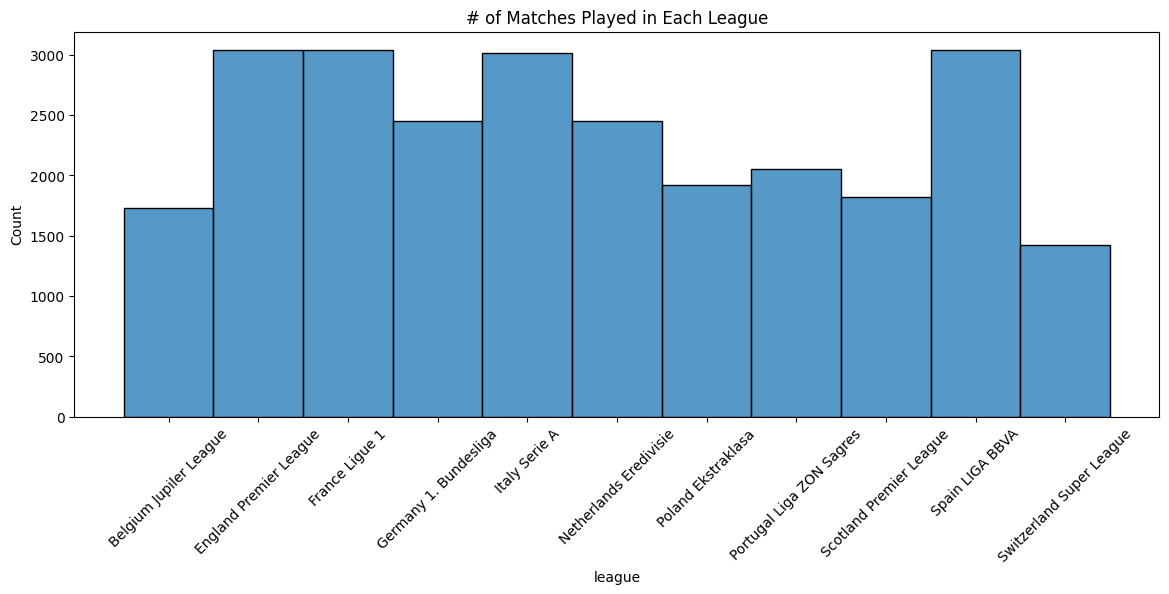

In [220]:
# Status
plt.figure(figsize=(14,5))
sns.histplot(data=df, x="league")
plt.xticks(rotation=45)
plt.title("# of Matches Played in Each League")

# 1. How does a team being a home vs away factor in to their goals in a game in European soccer?

Home team goals grouped by team and league

In [193]:
df_home_goals = df.groupby(["league","home_team"])[["home_team_goal"]].mean()
print(df_home_goals)

                                                  home_team_goal
league                   home_team                              
Belgium Jupiler League   Beerschot AC                   1.473684
                         Club Brugge KV                 2.216981
                         FCV Dender EH                  1.235294
                         KAA Gent                       1.954128
                         KAS Eupen                      1.000000
...                                                          ...
Switzerland Super League FC Zürich                      1.685315
                         Grasshopper Club Zürich        1.636364
                         Lugano                         1.388889
                         Neuchâtel Xamax                1.682540
                         Servette FC                    1.171429

[296 rows x 1 columns]


Average away team goals grouped by team

In [194]:
df_away_goals = df.groupby(["away_team"])[["away_team_goal"]].mean()
print(df_away_goals)

                          away_team_goal
away_team                               
1. FC Kaiserslautern            1.029412
1. FC Köln                      1.078431
1. FC Nürnberg                  1.000000
1. FSV Mainz 05                 1.252101
AC Ajaccio                      0.912281
...                                  ...
Xerez Club Deportivo            0.947368
Zagłębie Lubin                  1.011111
Zawisza Bydgoszcz               1.066667
Évian Thonon Gaillard FC        0.986842
Śląsk Wrocław                   1.183333

[296 rows x 1 columns]


New DataFrame which includes away team goals and home team goals as columns for each given team. New column "home_away_difference" which calculates the difference between home and away goals for a given team

In [221]:
df_goals = df_home_goals.merge(right=df_away_goals,  how="inner", left_on="home_team", right_on="away_team")
df_goals = df_goals.assign(home_away_difference = df_goals['home_team_goal'] - df_goals['away_team_goal'])
df_goals

,home_team_goal,away_team_goal,home_away_difference
0,1.473684,0.815789,0.657895
1,2.216981,1.754717,0.462264
2,1.235294,1.352941,-0.117647
3,1.954128,1.623853,0.330275
4,1.000000,0.866667,0.133333
...,...,...,...
291,1.685315,1.587413,0.097902
292,1.636364,1.363636,0.272727
293,1.388889,1.166667,0.222222
294,1.682540,1.031746,0.650794


On average, European soccer teams from 2008 to 2016 scored 0.35 more goals when they were the home team than when they were away.

In [196]:
df_goals["home_away_difference"].mean()

0.3546194124009011

# 2. How does a team's average goal differential as the home team contribute to whether or not they win?

Add columns goal differential and win to new DataFrame

In [197]:
df_gd = df.merge(right=df_home_goals, on="home_team", suffixes = ["", "_differential"])
df_gd = df_gd.assign(win = df["home_team_goal"] > df["away_team_goal"])
df_gd.head(5)

,season,stage,date,home_team_goal,away_team_goal,league,home_team,away_team,home_team_goal_differential,win
0,2008/2009,1.0,2008-08-17 00:00:00,1.0,1.0,Belgium Jupiler League,KRC Genk,Beerschot AC,1.933962,False
1,2008/2009,1.0,2008-08-16 00:00:00,0.0,0.0,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,1.660377,False
2,2008/2009,1.0,2008-08-16 00:00:00,0.0,3.0,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,1.307692,False
3,2008/2009,1.0,2008-08-17 00:00:00,5.0,0.0,Belgium Jupiler League,KAA Gent,RAEC Mons,1.954128,True
4,2008/2009,1.0,2008-08-16 00:00:00,1.0,3.0,Belgium Jupiler League,FCV Dender EH,Standard de Liège,1.235294,False


In [198]:
# Calculate each team's win percentage as the home team
win_percentage = df_gd.groupby("home_team")["win"].sum() / df_gd.groupby("home_team")["win"].count()
win_percentage

home_team
1. FC Kaiserslautern        0.235294
1. FC Köln                  0.313725
1. FC Nürnberg              0.352941
1. FSV Mainz 05             0.462185
AC Ajaccio                  0.280702
                              ...   
Xerez Club Deportivo        0.315789
Zagłębie Lubin              0.388889
Zawisza Bydgoszcz           0.433333
Évian Thonon Gaillard FC    0.381579
Śląsk Wrocław               0.491667
Name: win, Length: 296, dtype: float64

In [199]:
# Find each team's average goal differential
goal_diff = df_gd.groupby("home_team")["home_team_goal_differential"].first()

In [200]:
# Create a dataframe with columns win_percentage and goal_diff to compare in a scatterplot
df_goalvwin = pd.DataFrame({'win_percentage': win_percentage, 'goal_diff': goal_diff})
df_goalvwin

,win_percentage,goal_diff
home_team,,
1. FC Kaiserslautern,0.235294,1.088235
1. FC Köln,0.313725,1.137255
1. FC Nürnberg,0.352941,1.270588
1. FSV Mainz 05,0.462185,1.436975
AC Ajaccio,0.280702,1.122807
...,...,...
Xerez Club Deportivo,0.315789,1.052632
Zagłębie Lubin,0.388889,1.288889
Zawisza Bydgoszcz,0.433333,1.433333


Text(0.5, 1.0, 'Average Goal Differential v. Win Percentage of a Team')

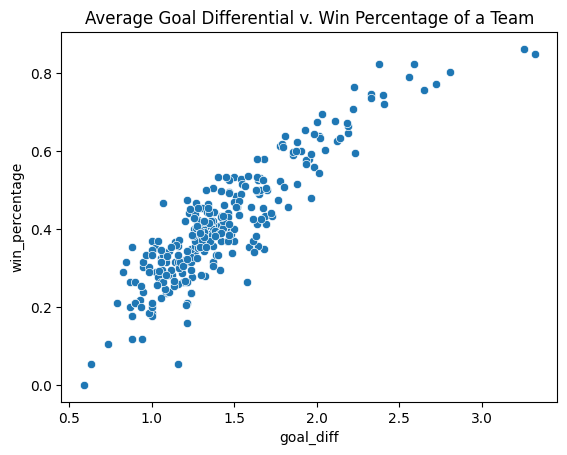

In [222]:
# Create a scatterplot plotting win percentage vs. average goal differential
sns.scatterplot(data=df_goalvwin, x="goal_diff", y="win_percentage")
plt.title("Average Goal Differential v. Win Percentage of a Team")

In [224]:
# Find matches where the home team won and save it in a dataframe
df_gd = df_gd.loc[df_gd["win"] == True]
gd = df_gd["home_team_goal_differential"]
gd.head(5)

3     1.954128
8     1.362637
9     2.216981
21    1.307692
25    1.362637
Name: home_team_goal_differential, dtype: float64

Histogram of Goal Differential to Wins in European Soccer Games

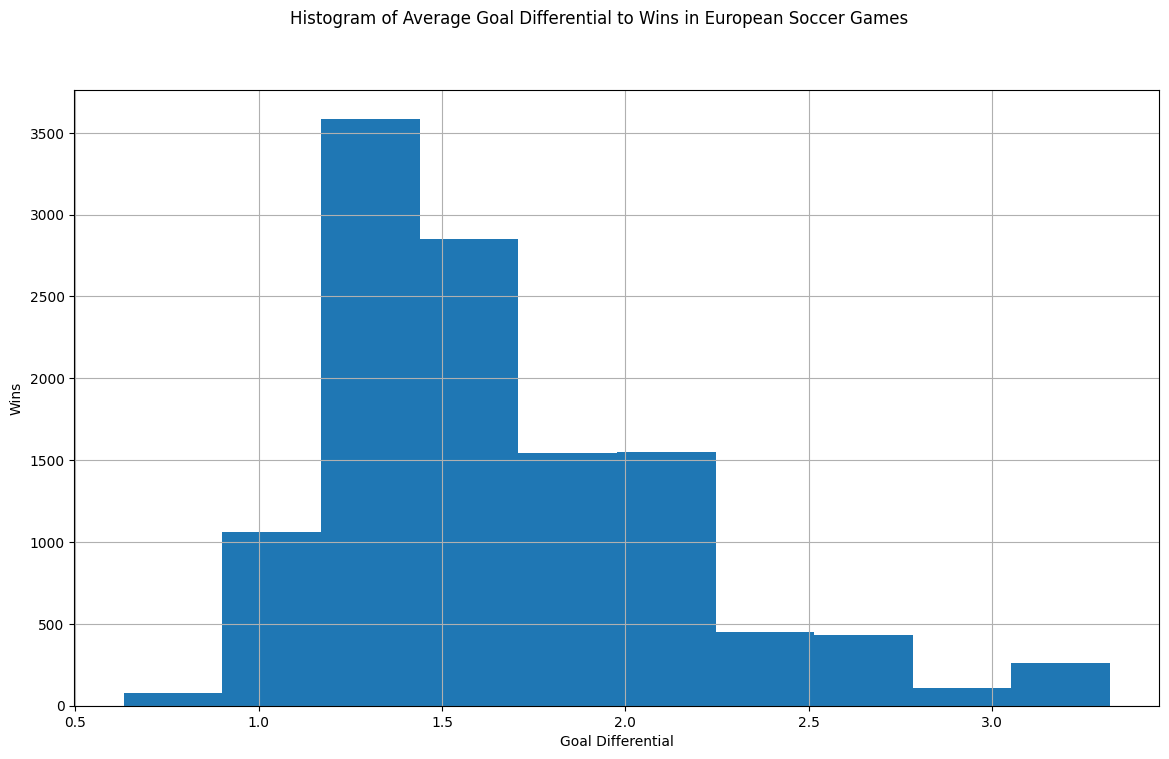

In [226]:
# Create histogram showing the number of wins and average goal differential of a team
gd.hist(figsize=(14, 8), bins = 10)
plt.suptitle("Histogram of Average Goal Differential to Wins in European Soccer Games")
plt.ylabel("Wins")
plt.xlabel("Goal Differential")
plt.show()

# 3. How does the month a specific European team plays in affect their play?

In [204]:
# New dataframe containing matches that the Everton team has played in
df_everton = df.query(("home_team == 'Everton' or away_team == 'Everton'"))
df_everton

,season,stage,date,home_team_goal,away_team_goal,league,home_team,away_team
1733,2008/2009,1.0,2008-08-16 00:00:00,2.0,3.0,England Premier League,Everton,Blackburn Rovers
1741,2008/2009,10.0,2008-10-29 00:00:00,0.0,1.0,England Premier League,Bolton Wanderers,Everton
1750,2008/2009,11.0,2008-11-01 00:00:00,1.0,0.0,England Premier League,Everton,Fulham
1761,2008/2009,12.0,2008-11-08 00:00:00,1.0,3.0,England Premier League,West Ham United,Everton
1771,2008/2009,13.0,2008-11-16 00:00:00,1.0,1.0,England Premier League,Everton,Middlesbrough
...,...,...,...,...,...,...,...,...
4720,2015/2016,5.0,2015-09-12 00:00:00,3.0,1.0,England Premier League,Everton,Chelsea
4736,2015/2016,6.0,2015-09-19 00:00:00,0.0,0.0,England Premier League,Swansea City,Everton
4746,2015/2016,7.0,2015-09-28 00:00:00,2.0,3.0,England Premier League,West Bromwich Albion,Everton
4753,2015/2016,8.0,2015-10-04 00:00:00,1.0,1.0,England Premier League,Everton,Liverpool


In [205]:
# Create a new column in the dataframe containing the month the match was in
def get_month(date):
    index = date.index("-")
    date = date[index + 1:index + 3]
    return date

df_everton["month"] = df_everton["date"].map(get_month)

/var/folders/gx/k5m32j_16ts37x6v8_n14c9h0000gn/T/ipykernel_47894/2077659174.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_everton["month"] = df_everton["date"].map(get_month)


In [206]:
df_everton.head(5)
df_everton = df_everton.sort_values(["month"])

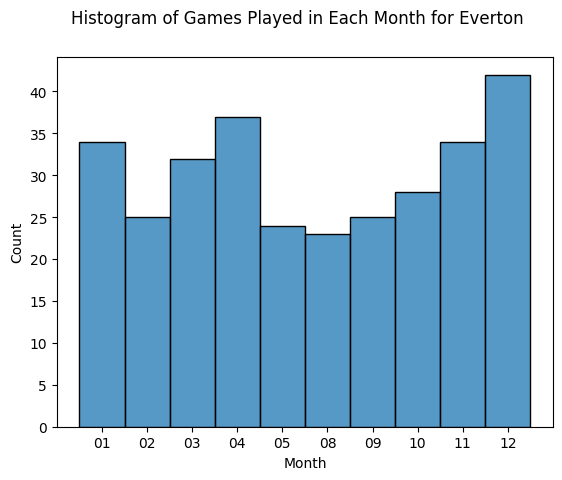

In [229]:
# Create a histogram of the matches Everton has played each month
months = df_everton["month"]
months = pd.DataFrame({"month": months})
sns.histplot(data=months, x="month")
plt.suptitle("Histogram of Games Played in Each Month for Everton")
plt.xlabel("Month")
plt.show()

In [230]:
# New DataFrame containing only matches where Everton was the home team
df_everton_home = df_everton.query("home_team == 'Everton'")
home_games_each_month = df_everton_home["month"].value_counts()
home_games_each_month = home_games_each_month.sort_index()
home_games_each_month

month
01    16
02    13
03    17
04    18
05    11
08    12
09    12
10    14
11    17
12    22
Name: count, dtype: int64

In [209]:
# New DataFrame containing only matches where Everton was the away team
df_everton_away = df_everton.query("away_team == 'Everton'")
home_sum = df_everton_home.groupby(["month"])[["home_team_goal"]].sum()
# Calculates average goals per game in each month where Everton was the home team
home_gpg = home_sum["home_team_goal"] / home_games_each_month
# Converts series to dataframe
home_gpg = pd.DataFrame({"Goals Per Game":home_gpg})

In [210]:
away_games_each_month = df_everton_away["month"].value_counts()
away_games_each_month = away_games_each_month.sort_index()
away_sum = df_everton_away.groupby(["month"])[["away_team_goal"]].sum()
# Calculates average goals per game in each month where Everton was the away team
away_gpg = away_sum["away_team_goal"] / away_games_each_month
# Converts series to dataframe
away_gpg = pd.DataFrame({"Goals Per Game":away_gpg})

Text(0.5, 1.0, "Everton's Average Home Goals Per Game for Each Month")

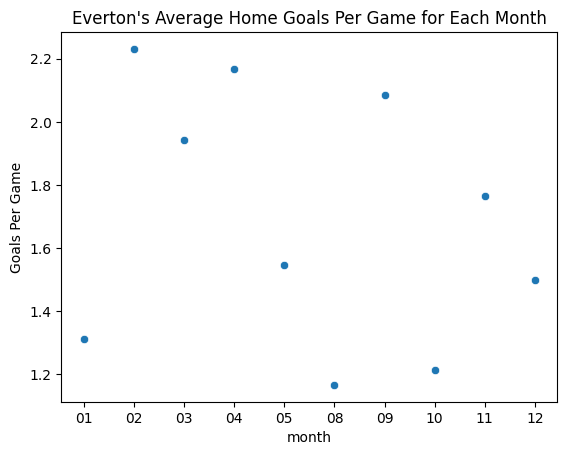

In [211]:
# Creates scatterplot of Everton's average home goals per game every month
sns.scatterplot(data=home_gpg, x="month", y="Goals Per Game")
plt.title("Everton's Average Home Goals Per Game for Each Month")

Text(0.5, 1.0, "Everton's Average Away Goals Per Game for Each Month")

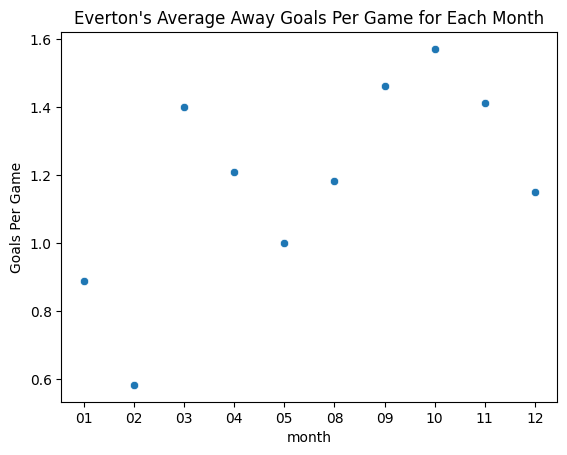

In [212]:
# Creates scatterplot of Everton's average away goals per game every month
sns.scatterplot(data=away_gpg, x="month", y="Goals Per Game")
plt.title("Everton's Average Away Goals Per Game for Each Month")

In [232]:
# Max average goals per game in a certain month as the home team and away team
print(home_gpg.max())
away_gpg.max()

Goals Per Game    2.230769
dtype: float64


Goals Per Game    1.571429
dtype: float64

In [214]:
# Add column win for whether or not Everton has won
df_everton_home = df_everton_home.assign(win = df_everton_home["home_team_goal"] > df_everton_home["away_team_goal"])
df_everton_away = df_everton_away.assign(win = df_everton_away["away_team_goal"] > df_everton_away["home_team_goal"])

In [215]:
# Calculate Everton's away and home win percentages for each month
away_win_pg = df_everton_away.groupby("month")["win"].sum() / df_everton_away.groupby("month")["win"].count()
home_win_pg = df_everton_home.groupby("month")["win"].sum() / df_everton_home.groupby("month")["win"].count()
# Converts series to dataframes
away_win_pg = pd.DataFrame({"Win Percentage":away_win_pg})
home_win_pg = pd.DataFrame({"Win Percentage":home_win_pg})

Text(0.5, 1.0, "Everton's Away Win Percentages for Each Month")

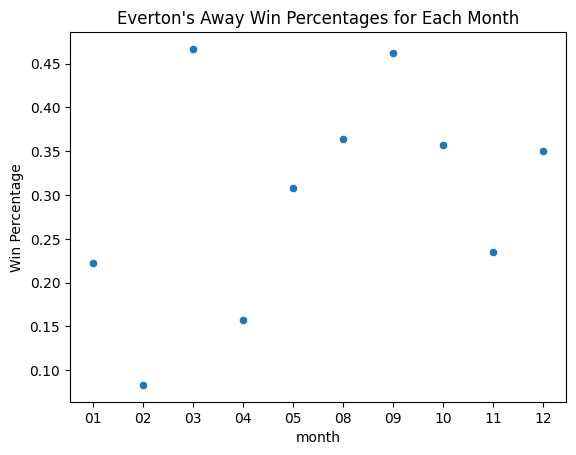

In [216]:
# Creates scatterplot of everton's away win percentage for each month
sns.scatterplot(data=away_win_pg, x="month", y="Win Percentage")
plt.title("Everton's Away Win Percentages for Each Month")

Text(0.5, 1.0, "Everton's Home Win Percentages for Each Month")

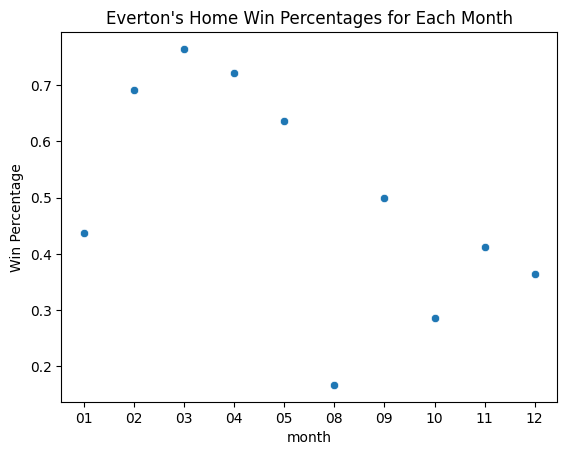

In [217]:
# Creates scatterplot of everton's home win percentage for each month
sns.scatterplot(data=home_win_pg, x="month", y="Win Percentage")
plt.title("Everton's Home Win Percentages for Each Month")

In [233]:
# 76.5% home win percentage in March
home_win_pg.max()

Win Percentage    0.764706
dtype: float64


In [234]:
# 46.7% away win percentage in March.
away_win_pg.max() 

Win Percentage    0.466667
dtype: float64